Writing the narrative.

In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

TOTALS = pickle.load(open('../data/Detailed_Sex_RaceEthnicity_Graduates.p', 'rb'))
GRAD_TOTALS = pickle.load(open('../data/Sex_Graduates.p', 'rb'))

years = sorted(TOTALS.keys())
institutions = sorted(TOTALS[ max(years) ].keys())
fields = sorted(TOTALS[ max(years) ]['Columbia University in the City of New York'].keys())

In [9]:
# Convenient function for making subplots for every institution
def subplots(num=len(institutions), cols=2, figsize=8):
    rows = math.ceil(num / cols)
    return plt.subplots(rows, cols, figsize=(figsize * cols, figsize * rows))

# Returns female proportions for an institution
def get_inst_proportions(totals, inst):
    props = []
    for year in years:
        inst_data = totals[year][inst]
        props.append(inst_data['Female'] / inst_data['Total for selected values'])
    return props

def plot_inst_proportions(totals, title, highlight='Columbia University in the City of New York'):
    plt.figure(figsize=(8, 8))

    for inst in institutions:
        if inst != highlight:
            plt.plot(years, get_inst_proportions(totals, inst), label=inst)
    plt.plot(years, get_inst_proportions(totals, highlight), label=highlight, color='black', linewidth=3)
    
    plt.plot(years, [0.5 for _ in years], color='lightgray', linestyle='--')
    plt.ylim(bottom=0, top=1)
    
    plt.ylabel('Proportion female')
    plt.title(title)
    plt.legend(loc='upper right')
    plt.grid()

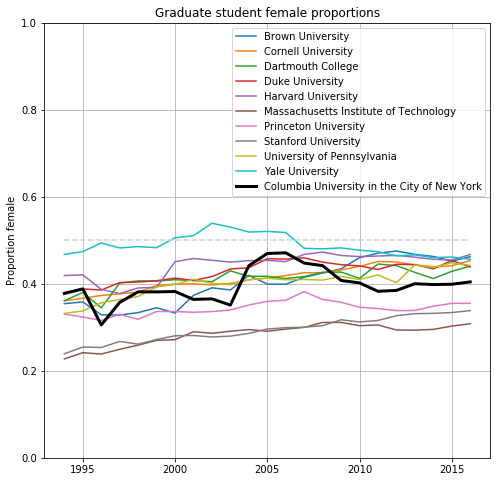

In [11]:
plot_inst_proportions(GRAD_TOTALS, 'Graduate student female proportions')

In [12]:
def get_proportions(inst, field):
    proportions = []
    for year in years:
        field_stats = TOTALS[year][inst].get(field, None)
        if field_stats is None:
            proportions.append(None)
        else:
            fem_count = field_stats.get('Female', 0)
            if isinstance(fem_count, dict):
                fem_count = fem_count['Total for selected values']
                
            proportions.append(
                fem_count /
                    field_stats['Total for selected values']['Total for selected values']
            )
    return proportions

# Plots female proportions for every institution for a field, highlighting one, in a line graph
def plot_inst(ax, field, highlight='Columbia University in the City of New York'):
    for inst in institutions:
        if inst == highlight:
            continue
        ax.plot(years, get_proportions(inst, field), label=inst)
    ax.plot(years, get_proportions(highlight, field), label=highlight, linewidth=3, color='black')
    
    ax.set_ylabel('Percent female')
    ax.legend()
    ax.set_ylim(top=1, bottom=0)
    ax.set_title(f'{field}: Comparing Columbia\'s peers')
    
    # Format y tick labels to be percentages
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

In [ ]:
fig, axArr = subplots(3, cols=3)
for i, field in enumerate(selected_fields):
    plot_triplet(axArr, i, field)plot_inst(axArr[i, 0], field)